In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

delta_list = [0.5,1,2,5,10]
gamma_list =[0.1,0.25,0.5,0.75,0.9]

In [42]:
df = pd.read_csv('vis_fix_gamma.txt', delimiter=' ',header = None)
df.columns = ["gamma","delta",'T', 'z', 'ppl']
for i in delta_list:
    filtered_df = df[(df.iloc[:, 1] == i) & (df.iloc[:, 0]== 0.25)]
    filtered_df.columns = ["gamma","delta",'T', 'z', 'ppl']
    filtered_df["T"] = round(df["T"],-1)
    grouped = filtered_df.groupby("T")
    filtered_df = grouped["z"].mean()
    print(filtered_df)
    x = filtered_df.iloc[:, 2]
    y = filtered_df.iloc[:, 3]

    plt.plot(x, y, label='δ = {}, γ = {}'.format(i, 0.25))

plt.xlabel('T')
plt.ylabel('z_score')
plt.title('Plot of Filtered Data')
plt.legend()
plt.grid(True)

plt.show()


T
10.0    NaN
20.0    NaN
30.0    NaN
40.0    NaN
50.0    NaN
60.0    NaN
70.0    NaN
80.0    NaN
90.0    NaN
100.0   NaN
110.0   NaN
120.0   NaN
130.0   NaN
140.0   NaN
150.0   NaN
160.0   NaN
170.0   NaN
180.0   NaN
190.0   NaN
200.0   NaN
Name: z, dtype: float64


IndexingError: Too many indexers

C:\Users\BriAN\AppData\Local\Temp\ipykernel_12320\4275426593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["T"] = round(df["T"],-1)
C:\Users\BriAN\AppData\Local\Temp\ipykernel_12320\4275426593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["T"] = round(df["T"],-1)
C:\Users\BriAN\AppData\Local\Temp\ipykernel_12320\4275426593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

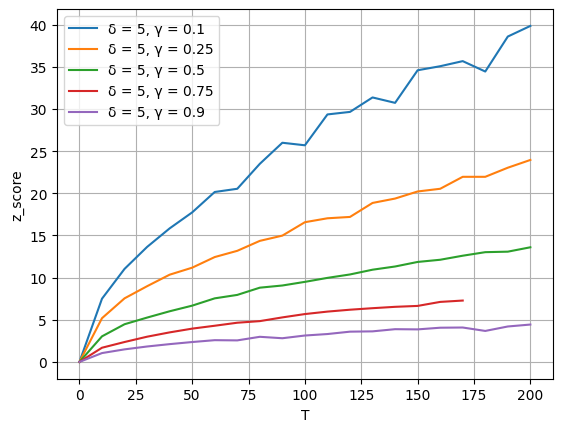

In [50]:
df = pd.read_csv('vis_fix_delta.txt', delimiter=' ',header = None)
df.columns = ["gamma","delta",'T', 'z', 'ppl']
for j in gamma_list:
    filtered_df = df[(df.iloc[:, 1] == 5) & (df.iloc[:, 0]== j)]
    filtered_df["T"] = round(df["T"],-1)
    grouped = filtered_df.groupby("T")
    filtered_df = grouped["z"].mean()
    filtered_df[0] = 0
    result = filtered_df.sort_index()

    plt.plot(result.index, result.values, label='δ = {}, γ = {}'.format(5, j))

plt.xlabel('T')
plt.ylabel('z_score')
# plt.title('Plot of Filtered Data')
plt.legend()
plt.grid(True)

plt.show()

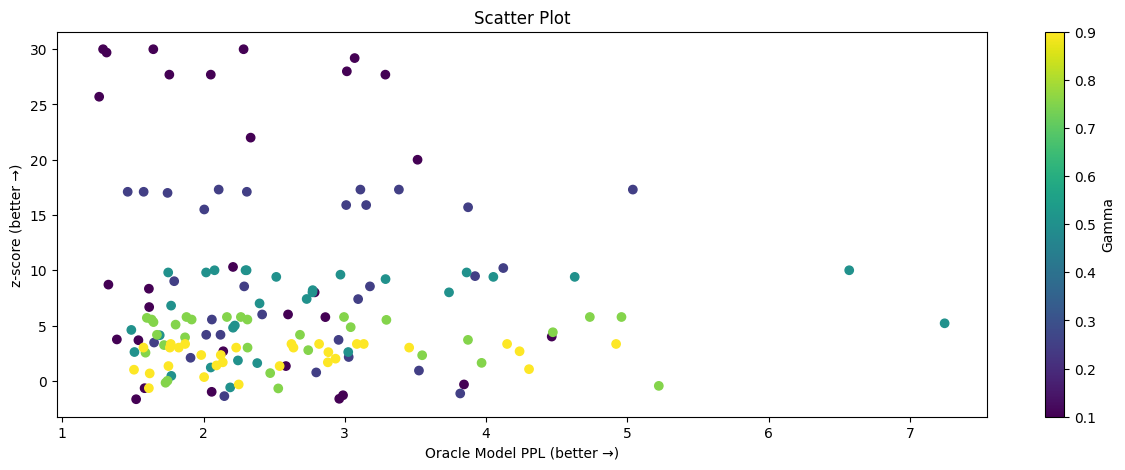

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 提取数据列
gamma = df.iloc[:, 0]
delta = df.iloc[:, 1]
T= df.iloc[:, 2]
z_score = df.iloc[:, 3]
ppl = df.iloc[:, 4]
# shape = {0:"*", 1:'D', 2:"p", 5:'h', 10:'o'}
# shape = ['*']*30+ ['D']*30+ ['*']*30+ ['*']*30+ ['*']*30
fig = plt.figure(figsize=(15,5))

# 调整颜色深浅与 gamma 值有关
plt.scatter(ppl, z_score, c=gamma, cmap='viridis')

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label('Gamma')

# 添加标签和标题
plt.xlabel('Oracle Model PPL (better →)')
plt.ylabel('z-score (better →)')
plt.title('Scatter Plot')

# 显示图形
plt.show()


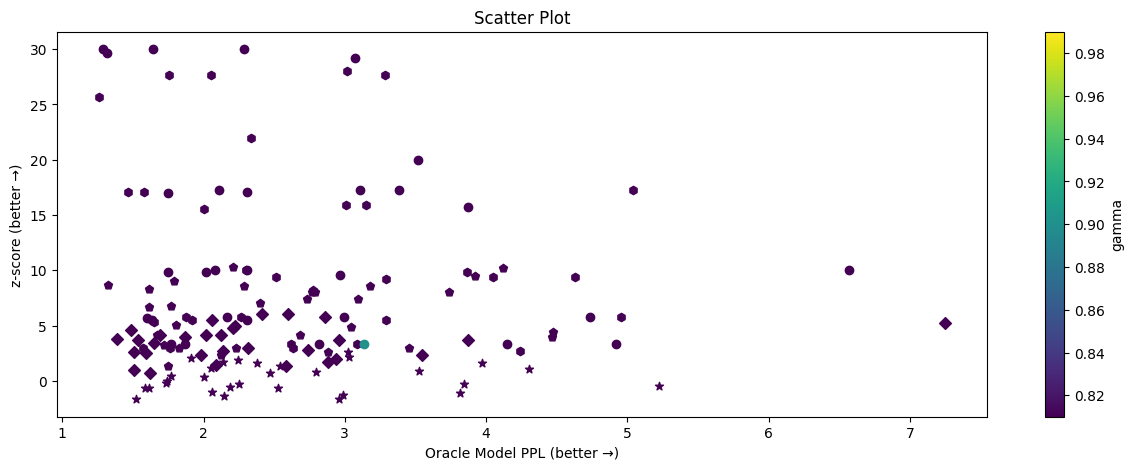

In [12]:
import matplotlib.pyplot as plt

# 假设 df 是你的 DataFrame，具有 x、y、label 和 color bar 列
# 例如，df = pd.read_csv('your_file.txt', delimiter='\t')

# 提取数据列
gamma = df.iloc[:, 0]
delta = df.iloc[:, 1]
T= df.iloc[:, 2]
z_score = df.iloc[:, 3]
ppl = df.iloc[:, 4]
shape = {0:"*", 1:'D', 2:"p", 5:'h', 10:'o'}
# shape = ["*",'D', "p", 'h', 'o']
fig = plt.figure(figsize=(15,5))
for i in range(len(gamma)):
    # for j in range(len(delta)):
    #     filtered_df = df[(df.iloc[:, 1] == delta[j]) & (df.iloc[:, 0]== gamma[i])]
    #     # print(filtered_df)
    #     x = filtered_df.iloc[:, 4]
    #     y = filtered_df.iloc[:, 3]
    #     plt.scatter(x, y, label='δ = {}'.format(delta[j]))
    #     # plt.scatter(x, y, c = [gamma[i]]*x.size, cmap='viridis', marker = shape[j],label='δ = {}'.format(delta[j]))
    #     # plt.scatter(x, y, c = [gamma[i]]*len(x), cmap='viridis', marker = shape[j],label='δ = {}'.format(delta[j]))
    # print(gamma[i])
    plt.scatter(ppl[i], z_score[i], c = gamma[i], cmap='viridis', label='δ = {}'.format(delta[i]), marker=shape[delta[i]])
plt.colorbar(label='gamma')
# 添加标签和标题
plt.xlabel('Oracle Model PPL (better →)')
plt.ylabel('z-score (better →)')
plt.title('Scatter Plot')
# 显示图形
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ModuleNotFoundError: No module named 'sklearn'